In [1]:
class User:
    # def __init__(self):
    #     self.name = name
    #     self.id = id 
    def login(self):
        return "Logged in!"
    def logout(self):
        return "Logged out!"
    def _protected(self): # cant be access by child class
        pass
    def __private(self): # cant be access by child class
        pass

class Student(User):
    pass

In [2]:
u1 = User()

In [3]:
s1 = Student()

In [4]:
s1.login()

'Logged in!'

In [5]:
s1.logout()

'Logged out!'

In [6]:
s1.private()

AttributeError: 'Student' object has no attribute 'private'

In [7]:
s1.protected()

AttributeError: 'Student' object has no attribute 'protected'

In [8]:
class User:
    def __init__(self,name,id,age,passcode):
        self.name = name
        self.id = id
        self.age = age
        self.passcode = passcode
    def login(self):
        return "Logged in!"
    def logout(self):
        return "Logged out!"
    def _protected(self): # cant be access by child class
        pass
    def __private(self): # cant be access by child class
        pass


In [9]:
class Student(User):
    def __init__(self,marks,rollnumber,name,id,age,passcode):
        self.marks = marks
        self.rollnumber = rollnumber
        self.name = name
        self.id = id
        self.age = age
        self.passcode = passcode

In [10]:
s1 = Student(100,11,"Zain",1,18,000)

Here, we have some attribute exactly same but we are making them in both parent and child classes which is not the good practice

OOP is a concept which makes thing easier!

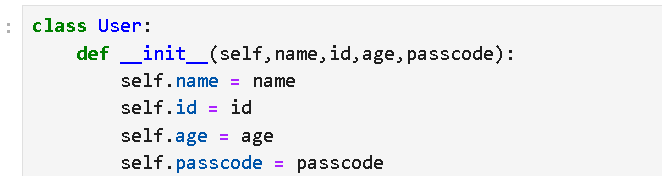

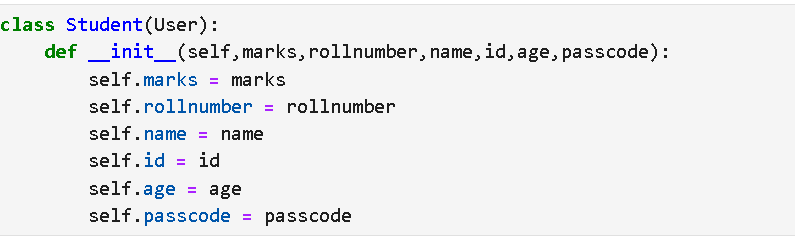

## Correct method, using super() : 

In [11]:
class Student(User):
    def __init__(self,marks,rollnumber,name,id,age,passcode):

        super().__init__(name,id,age,passcode)
        self.marks = marks
        self.rollnumber = rollnumber 
    def login(self):
        pass

In [12]:
s1 = Student(100,11) # giving only marks and rollnumber

TypeError: Student.__init__() missing 4 required positional arguments: 'name', 'id', 'age', and 'passcode'

we  have to provide these all...

In [13]:
s1 = Student(100,11,"Zain",111,18,000)

its working!

but we cannot use it outside like this : 

In [14]:
s1.super().login()

AttributeError: 'Student' object has no attribute 'super'

another use case: 

In [23]:
class User:
    def __init__(self,name,id,age,passcode):
        self.name = name
        self.id = id
        self.age = age
        self.passcode = passcode
    def login(self):
         print("Logged in!")

In [24]:
class Student(User):
    def __init__(self,marks,rollnumber,name,id,age,passcode):

        super().__init__(name,id,age,passcode)
        self.marks = marks
        self.rollnumber = rollnumber 
    def login(self):
        print("OTP sent!")
        super().login()

In [25]:
s1 = Student(100,11,"Zain",111,18,000)

In [26]:
s1.login()

OTP sent!
Logged in!


we can use methods with super() but we cannot use variables (for e.g. name,id) with super()

## Final program to understand everything about inheritance:

In [27]:
class User:
    def __init__(self):
        print("User Constructor")
        self.website = "www.flipkart.com"
        self._field = "ecommerce" # protected Member
        self.__duration = "12 months" #Private
        self.__name = "flipkart User"
    def login(self):
        print("logged in")
        
    def logout(self):
        print("logged out") 

In [28]:
class Buyer(User):
    def __init__(self):
        print("Buyer Constructor")
        super().__init__()
        self.website ="www.amazon.in"
        self.__name = "Buyer"
    
    def login(self):
        super().logout()
        
        print("mentor logged in")
        print(self._field) # accessible
        print(self.__name) # Not Accessible

In [30]:
b1 = Buyer()

Buyer Constructor
User Constructor


In [32]:
b1.name

AttributeError: 'Buyer' object has no attribute 'name'

In [34]:
b1.website # here both have .website so when we access the website from child class perspective we will get the website name listed in the child class

'www.amazon.in'

In [37]:
def test_inheritance():
    print("=== Creating Buyer object ===")
    b1 = Buyer()  # Will call both Buyer and User constructors
    
    print("\n=== Accessing website ===")
    print(f"Website: {b1.website}")  # Accesses Buyer's website (www.amazon.in)
    # Explanation: Child class overrides parent's website attribute
    
    print("\n=== Accessing protected _field ===")
    print(f"Protected field: {b1._field}")  # Accesses User's _field (ecommerce)
    # Explanation: Protected members are accessible in child class (by convention)
    
    print("\n=== Trying to access private __name ===")
    try:
        print(b1.__name)  # Will raise AttributeError
    except AttributeError:
        print("Error: Cannot access private __name directly")
    # Explanation: Private attributes are name-mangled and not directly accessible
       
    print("\n=== Calling login method ===")
    b1.login()  # Calls Buyer's login, which calls User's logout
    # Explanation: Child's login overrides parent's; super() allows calling parent's methods
    
    print("\n=== Calling logout method ===")
    b1.logout()  # Calls User's logout (not overridden in Buyer)
    # Explanation: Since Buyer doesn't override logout, parent's method is used

# Run the test
if __name__ == "__main__":
    test_inheritance()

=== Creating Buyer object ===
Buyer Constructor
User Constructor

=== Accessing website ===
Website: www.amazon.in

=== Accessing protected _field ===
Protected field: ecommerce

=== Trying to access private __name ===
Error: Cannot access private __name directly

=== Calling login method ===
logged out
mentor logged in
ecommerce
Buyer

=== Calling logout method ===
logged out
